## ALGORITMO DE AGRUPAMIENTO CON K-MEANS

1. Importar librerías para el procesamiento y visualización de los datos

In [1]:
import pandas as pd # Librería para manipulación de los datos
import os # Librería para fijar los parámetros de configuración del sistema
import matplotlib.pyplot as plt # Librería para graficar los datos analizados
import seaborn as sns # Librería para graficar los datos analizados
from sklearn.cluster import KMeans # Librería para agrupar y evaluar el algoritmo
import plotly.express as px #Librería para hacer gráficos interactivos

2. Extraer el Dataframe para su lectura

In [2]:
data=pd.read_csv('https://www.datos.gov.co/resource/etr2-mkeu.csv', encoding='utf-8')
data

,codigo_pvd,id_dircon,region,dane_dpto,depto,dane_mun,municipio,tipo_pvd,proveedor_conectividad,fecha_instalacion_conectividad,...,contrato_ejecutor,vigencia_contrato_ejecutor,fase_h,fase_n,costo_fase_h,costo_fase_n,costo,fechacorte,indicador_aspa,vigencia
0,69115,69115,Regi�n Centro Orient,25,CUNDINAMARCA,25658,SAN FRANCISCO,TIPO A,UNI�N TEMPORAL CONECTANDO COLOMBIA,2015-12-31,...,0,NaN,FASE 1 ETAPA 2,NaN,NaN,NaN,"402343429,06",2015-12-31,4144,2015-12-31
1,70094,70094,Regi�n Eje Cafetero,63,QUINDIO,63594,QUIMBAYA,TIPO D,UNI�N TEMPORAL CLARO,2016-12-31,...,0,NaN,FASE 1 ETAPA 2,NaN,NaN,NaN,"294044100,68",2016-12-31,4144,2016-12-31
2,68423,68423,Regi�n Eje Cafetero,5,ANTIOQUIA,5237,DON MATIAS,TIPO B,UNI�N TEMPORAL CONECTANDO COLOMBIA,2014-12-31,...,0,NaN,FASE 1,NaN,NaN,NaN,"373599674,00",2014-12-31,4144,2014-12-31
3,54943,54943,Regi�n Caribe,20,CESAR,20570,PUEBLO BELLO,TIPO PLUS FASE2,UNI�N TEMPORAL CONECTANDO COLOMBIA,2016-12-31,...,0,NaN,PLUS FASE 2,NaN,NaN,NaN,"497297637,46",2016-12-31,4144,2016-12-31
4,68584,68584,Regi�n Pac�fico,52,NARI�O,52885,YACUANQUER,TIPO A,UNI�N TEMPORAL CONECTANDO COLOMBIA,2014-12-31,...,0,NaN,FASE 1,NaN,NaN,NaN,"402343429,06",2014-12-31,4144,2014-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,14028,14028,Regi�n Centro Orient,25,CUNDINAMARCA,25535,PASCA,TIPO PLUS FASE2,UNI�N TEMPORAL CONECTANDO COLOMBIA,2015-12-31,...,0,NaN,PLUS FASE 2,NaN,NaN,NaN,"457945373,49",2015-12-31,4144,2015-12-31
889,69099,69099,Regi�n Eje Cafetero,17,CALDAS,17444,MARQUETALIA,TIPO B,UNI�N TEMPORAL CONECTANDO COLOMBIA,2015-12-31,...,0,NaN,FASE 1 ETAPA 2,NaN,NaN,NaN,"373599674,00",2015-12-31,4144,2015-12-31
890,68647,68647,Regi�n Pac�fico,76,VALLE DEL CAUCA,76520,PALMIRA,TIPO C,UNI�N TEMPORAL CLARO,2014-12-31,...,0,NaN,FASE 1,NaN,NaN,NaN,"324713082,91",2014-12-31,4144,2014-12-31
891,69691,69691,Regi�n Centro Orient,54,NORTE DE SANTANDER,54223,CUCUTILLA,TIPO B,UNI�N TEMPORAL CONECTANDO COLOMBIA,2015-12-31,...,0,NaN,FASE 1 ETAPA 2,NaN,NaN,NaN,"373599674,00",2015-12-31,4144,2015-12-31


3. Analisis Exploratorio de Datos.

In [3]:
data.describe()# Datos que describen al DataFrame 

,codigo_pvd,id_dircon,dane_dpto,dane_mun,direccion,nombre_de_contacto_1_ente_territorial,telefono_de_contacto_1,correo_de_contacto_1,nombre_de_contacto_2,telefono_de_contacto_2,...,inaugurado,anio_del_contrato_operador,vigencia_del_contrato,vigencia_contrato_proveedor,contrato_ejecutor,vigencia_contrato_ejecutor,fase_n,costo_fase_h,costo_fase_n,indicador_aspa
count,893.000000,893.000000,893.000000,893.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,893.0,0.0,0.0,0.0,0.0,893.0
mean,53310.292273,53310.292273,41.584546,41915.848824,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4144.0
std,23845.410879,23845.410879,26.092601,26067.819793,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
min,10001.000000,10001.000000,5.000000,5001.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4144.0
25%,18093.000000,18093.000000,17.000000,17001.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4144.0
50%,68584.000000,68584.000000,44.000000,44090.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4144.0
75%,69118.000000,69118.000000,68.000000,68081.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4144.0
max,70477.000000,70477.000000,88.000000,88564.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4144.0


4. Limpieza de los datos.

Se borra  las columnas con valores irrelevantes, cuando son mas de una columna aplicar en forma de diccionario la expresion con el metodo .drop()

In [4]:
data.drop(['direccion',
           'nombre_de_contacto_1_ente_territorial',
           'telefono_de_contacto_1',
           'correo_de_contacto_1',
           'nombre_de_contacto_2',
           'telefono_de_contacto_2',
           'correo_de_contacto_2',
           'inaugurado','fecha_inauguracion',
            'inaugurado_por',
            'anio_del_contrato_operador',
            'vigencia_del_contrato',
            'anio_del_contrato_operador',
            'vigencia_del_contrato',
            'vigencia_contrato_proveedor',
            'contrato_ejecutor',
            'vigencia_contrato_ejecutor',
            'fase_n','costo_fase_h','costo_fase_n'],axis=1,inplace=True) #eliminar columna

* Se hace un procedimiento consistente en borrar datos duplicados en el DataFrame

In [5]:
data = data.drop_duplicates()


* Se muestra el DataFrame con la información no relevante

In [6]:
data

,codigo_pvd,id_dircon,region,dane_dpto,depto,dane_mun,municipio,tipo_pvd,proveedor_conectividad,fecha_instalacion_conectividad,...,longitud,latitud,no_de_contrato_operador,contrato_contratista,contrato_proveedor,fase_h,costo,fechacorte,indicador_aspa,vigencia
0,69115,69115,Regi�n Centro Orient,25,CUNDINAMARCA,25658,SAN FRANCISCO,TIPO A,UNI�N TEMPORAL CONECTANDO COLOMBIA,2015-12-31,...,"5,46568700","-74,65708200",6672015-18102,6672015-2162858,6672015-18102,FASE 1 ETAPA 2,"402343429,06",2015-12-31,4144,2015-12-31
1,70094,70094,Regi�n Eje Cafetero,63,QUINDIO,63594,QUIMBAYA,TIPO D,UNI�N TEMPORAL CLARO,2016-12-31,...,"4,62125000","-75,76058333",6672015-18097,6672015-2162857,6672015-18097,FASE 1 ETAPA 2,"294044100,68",2016-12-31,4144,2016-12-31
2,68423,68423,Regi�n Eje Cafetero,5,ANTIOQUIA,5237,DON MATIAS,TIPO B,UNI�N TEMPORAL CONECTANDO COLOMBIA,2014-12-31,...,"6,48202777","-75,39155555",6672015-18102,6672015-2162857,6672015-18102,FASE 1,"373599674,00",2014-12-31,4144,2014-12-31
3,54943,54943,Regi�n Caribe,20,CESAR,20570,PUEBLO BELLO,TIPO PLUS FASE2,UNI�N TEMPORAL CONECTANDO COLOMBIA,2016-12-31,...,"10,42128000","-73,58100000",6672015-18101,6672015-2162855,6672015-18101,PLUS FASE 2,"497297637,46",2016-12-31,4144,2016-12-31
4,68584,68584,Regi�n Pac�fico,52,NARI�O,52885,YACUANQUER,TIPO A,UNI�N TEMPORAL CONECTANDO COLOMBIA,2014-12-31,...,"1,11568700","-77,40100500",6672015-18102,6672015-2162856,6672015-18102,FASE 1,"402343429,06",2014-12-31,4144,2014-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,14028,14028,Regi�n Centro Orient,25,CUNDINAMARCA,25535,PASCA,TIPO PLUS FASE2,UNI�N TEMPORAL CONECTANDO COLOMBIA,2015-12-31,...,"4,30971700","-74,30386600",6672015-18102,6672015-2162858,6672015-18102,PLUS FASE 2,"457945373,49",2015-12-31,4144,2015-12-31
889,69099,69099,Regi�n Eje Cafetero,17,CALDAS,17444,MARQUETALIA,TIPO B,UNI�N TEMPORAL CONECTANDO COLOMBIA,2015-12-31,...,"5,29619444","-75,05413888",6672015-18102,6672015-2162857,6672015-18102,FASE 1 ETAPA 2,"373599674,00",2015-12-31,4144,2015-12-31
890,68647,68647,Regi�n Pac�fico,76,VALLE DEL CAUCA,76520,PALMIRA,TIPO C,UNI�N TEMPORAL CLARO,2014-12-31,...,"3,50966400","-76,30381300",6672015-18097,6672015-2162856,6672015-18097,FASE 1,"324713082,91",2014-12-31,4144,2014-12-31
891,69691,69691,Regi�n Centro Orient,54,NORTE DE SANTANDER,54223,CUCUTILLA,TIPO B,UNI�N TEMPORAL CONECTANDO COLOMBIA,2015-12-31,...,"7,53920000","-72,77298000",6672015-18101,6672015-2162859,6672015-18101,FASE 1 ETAPA 2,"373599674,00",2015-12-31,4144,2015-12-31


5. Visualización de los datos

* Grafica tipo barra

Text(0, 0.5, 'DEPARTAMENTOS')

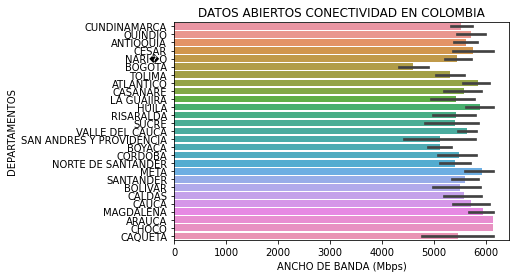

In [7]:
data_sort=data.sort_values('depto', ascending=False)
plt.title('DATOS ABIERTOS CONECTIVIDAD EN COLOMBIA')
sns.barplot(x='ancho_de_banda',y='depto',data=data);
plt.xlabel("ANCHO DE BANDA (Mbps)")
plt.ylabel("DEPARTAMENTOS")

* Gráfica interactiva con la librería Plotly

In [8]:
fig = px.bar(data, x='depto', y='ancho_de_banda', text='municipio')#el metodo "text" es para añadir etiquetas al gráfico.

#para añadir leyenda al gráfico
fig.update_layout(
    xaxis_title="Departamento analizado",
    yaxis_title="Ancho de banda (Mpbs)"
)

# Añadir un título al gráfico
fig.update_layout(
    title={'text':"ANALISIS DE LA CONECTIVIDAD EN COLOMBIA",'x':0.5,'xanchor':'center'},
)

#para ejecutar la grafica programada
fig.show()

* Gráfica tipo parcela

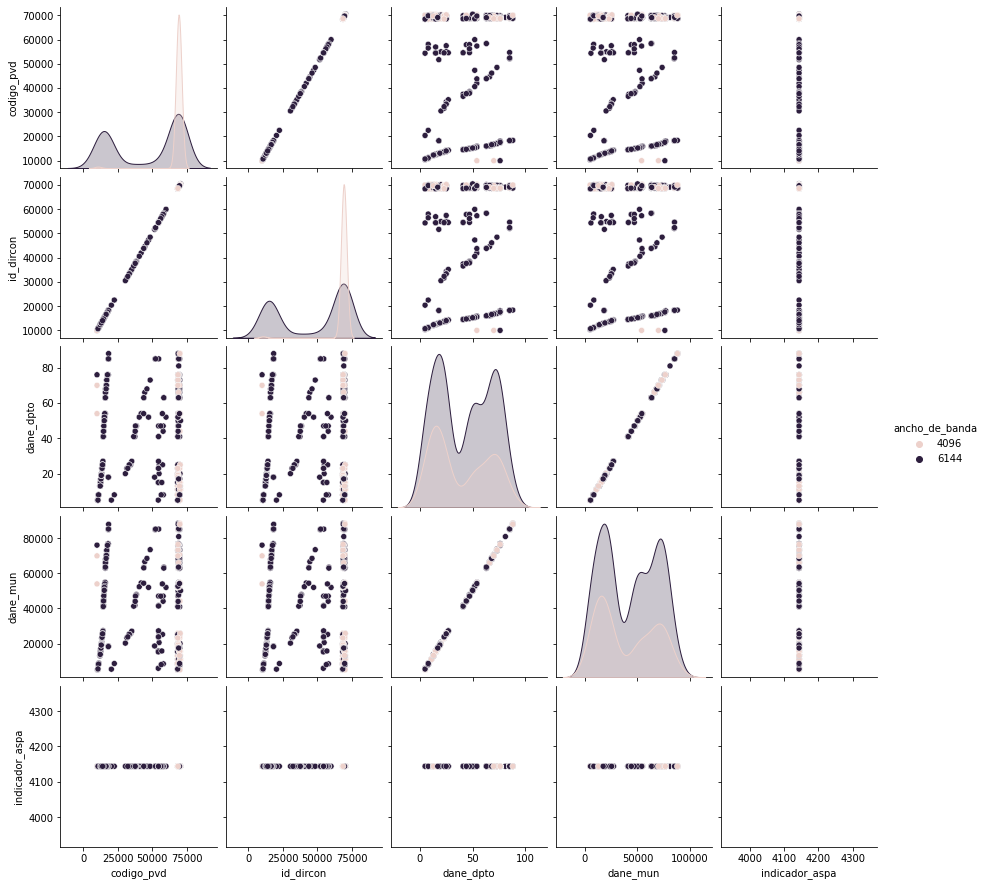

In [9]:
sns.pairplot(data, hue="ancho_de_banda")

* Conversion de datos a formato tiempo

In [10]:
#convertir datos a formato tiempo
data['fecha_instalacion_conectividad'] = pd.to_datetime(data['fecha_instalacion_conectividad'])

6.  Aplicación de un modelo ML de clustering o agrupamiento indicando que se debe entrenar on los datos.

El clustering consiste en agrupar ítems en grupos con características similares y se utiliza para determinar patrones climáticos, agrupar artículos por temas o para segmentar clientes. (UNIR,2021)

In [19]:
# Seleccionar las columnas para la clasificación
X = data[['ancho_de_banda','dane_dpto']]

# Inicializar el modelo de k-means
kmeans = KMeans(n_clusters=2)

# Entrenar el modelo con los datos
kmeans.fit(X)

# Obtener las etiquetas de los clusters y agregarlas al DataFrame
labels = kmeans.labels_
data['cluster'] = labels

# Imprimir el DataFrame con las etiquetas de los clusters
print("Se procede con imprimir las etiquetas con los clusters así:",data)

Se procede con imprimir las etiquetas con los clusters así:      codigo_pvd  id_dircon                region  dane_dpto  \
0         69115      69115  Regi�n Centro Orient         25   
1         70094      70094   Regi�n Eje Cafetero         63   
2         68423      68423   Regi�n Eje Cafetero          5   
3         54943      54943         Regi�n Caribe         20   
4         68584      68584       Regi�n Pac�fico         52   
..          ...        ...                   ...        ...   
888       14028      14028  Regi�n Centro Orient         25   
889       69099      69099   Regi�n Eje Cafetero         17   
890       68647      68647       Regi�n Pac�fico         76   
891       69691      69691  Regi�n Centro Orient         54   
892       68585      68585         Regi�n Caribe         70   

                  depto  dane_mun      municipio         tipo_pvd  \
0          CUNDINAMARCA     25658  SAN FRANCISCO           TIPO A   
1               QUINDIO     63594       QUIMB

* Filtrado del DataFrame, teniendo en cuenta la posición de las columnas

In [12]:
data.iloc[:,[ 4 , 3,  13 ]]# Números de columna

,depto,dane_dpto,ancho_de_banda
0,CUNDINAMARCA,25,6144
1,QUINDIO,63,4096
2,ANTIOQUIA,5,6144
3,CESAR,20,6144
4,NARI�O,52,6144
...,...,...,...
888,CUNDINAMARCA,25,6144
889,CALDAS,17,6144
890,VALLE DEL CAUCA,76,4096
891,NORTE DE SANTANDER,54,6144


* Filtrado teniendo en cuenta los nombres de las columnas del DataFrame

In [13]:
filtrado = data[["depto","dane_dpto","ancho_de_banda"]]# Nombre de las columnas
filtrado.head(10)

,depto,dane_dpto,ancho_de_banda
0,CUNDINAMARCA,25,6144
1,QUINDIO,63,4096
2,ANTIOQUIA,5,6144
3,CESAR,20,6144
4,NARI�O,52,6144
5,CUNDINAMARCA,25,4096
6,BOGOTA,11,6144
7,ANTIOQUIA,5,6144
8,TOLIMA,73,6144
9,NARI�O,52,6144


* Filtrado teniendo en cuenta el numero igual o mayor que N

In [14]:
filtrado[data.ancho_de_banda>=6000]
filtrado.head(10)

,depto,dane_dpto,ancho_de_banda
0,CUNDINAMARCA,25,6144
1,QUINDIO,63,4096
2,ANTIOQUIA,5,6144
3,CESAR,20,6144
4,NARI�O,52,6144
5,CUNDINAMARCA,25,4096
6,BOGOTA,11,6144
7,ANTIOQUIA,5,6144
8,TOLIMA,73,6144
9,NARI�O,52,6144


* Filtrado teniendo en cuenta el numero igual o mayor que N

In [15]:
filtrado[data.dane_dpto<=20]
filtrado.head(10)

,depto,dane_dpto,ancho_de_banda
0,CUNDINAMARCA,25,6144
1,QUINDIO,63,4096
2,ANTIOQUIA,5,6144
3,CESAR,20,6144
4,NARI�O,52,6144
5,CUNDINAMARCA,25,4096
6,BOGOTA,11,6144
7,ANTIOQUIA,5,6144
8,TOLIMA,73,6144
9,NARI�O,52,6144


* Elaborar una grafica de dispersión con los ajustes y entrenamiento del modelo K-means 

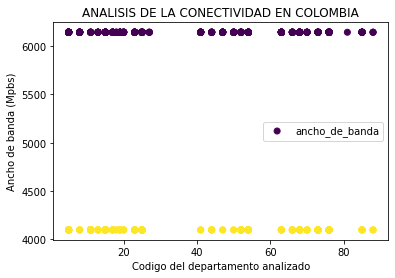

In [16]:
#graficar con base al modelo
plt.scatter(data['dane_dpto'], data['ancho_de_banda'], c=data['cluster'])

#crear la leyenda
plt.legend(['ancho_de_banda', 'dane_dpto'])

#crear los titulos en el grafico
plt.ylabel('Ancho de banda (Mpbs)')
plt.xlabel('Codigo del departamento analizado')
plt.title('ANALISIS DE LA CONECTIVIDAD EN COLOMBIA')
plt.show()

* Interpretación de los resultados gráficos 

<p style="text-align: justify;"> La gráfica muestra una visualización de los datos clasificados en tres clusters utilizando el modelo de k-means. Cada punto en la gráfica representa una observación en el conjunto de datos, y su posición en el eje x y el eje y representa sus valores correspondientes en las variables columna_1 y columna_2. Los puntos están coloreados según su etiqueta de cluster, lo que indica que pertenecen a un grupo específico. La leyenda muestra las etiquetas de las dos variables utilizadas en la gráfica. La interpretación de los resultados dependerá del conjunto de datos específico y del objetivo del análisis de clusterización. </p>

<p style="text-align: justify;">Para el caso de estudio, se está analizando la agrupación de los conjuntos de datos de Ancho de banda y el codigo del departamento a anlizar, observando que un grupo de departamento tiene velocidad de conexión superior a los 6.000 megabits por segundo, y otro grupo de departamento tiene conexiones por debajo de los 4.500 Megabits por segundo.</p>

7. Evaluacion del modelo por medio del algoritmo de arboles de decision

In [17]:
from sklearn.model_selection import cross_val_score 
from sklearn.tree import DecisionTreeClassifier 
 
# Preparar tus datos de evaluación 
X = data['dane_dpto'].values.reshape(-1, 1) # Características de los datos 
y = data['ancho_de_banda'].values.reshape(-1, 1) # Etiquetas de los datos 
 
# Crear un clasificador (por ejemplo, un árbol de decisiones) 
classifier = DecisionTreeClassifier() 
 
# Realizar validación cruzada y calcular la precisión promedio 
accuracy_scores = cross_val_score(classifier, X, y, cv=3, scoring='accuracy') 
average_accuracy = accuracy_scores.mean() 

print(accuracy_scores)


[0.69798658 0.69127517 0.7037037 ]


* Conviertiendo los resultados en formato porcentaje

In [18]:
porcentaje=accuracy_scores*100# Se multiplica por 100 los resultados arrojados con la aplicación del algoritmo
print('En la evaluación del modelo, éste maneja una precisión entre el:', porcentaje, 'por ciento (%)')

En la evaluación del modelo, éste maneja una precisión entre el: [69.79865772 69.12751678 70.37037037] por ciento (%)


8. Referencias Bibliográficas

Douglass, M. (2020). Book Review: Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow, 2nd edition by Aurélien Géron. Physical and Engineering Sciences in Medicine, 43(3), 1135-1136. https://doi.org/10.1007/s13246-020-00913-z

Naps. (2020, 30 septiembre). Pandas en Python: Filtrado y uso de query con Pandas en Python -. Naps Tecnología y educación. https://naps.com.mx/blog/uso-de-query-con-pandas-en-python/

Rodríguez, D., & Rodríguez, D. (2019). ¿Cómo eliminar columnas y filas en un dataframe pandas? Analytics Lane. https://www.analyticslane.com/2019/03/25/como-eliminar-columnas-y-filas-en-un-dataframe-pandas/

Unir, V. (2021, 8 octubre). Clustering: qué es y cuál es su uso en Big Data. UNIR. https://www.unir.net/ingenieria/revista/clustering/ 